<a href="https://colab.research.google.com/github/Crissalyn/CCINSYSL_ASSIGNMENT_COM-DF211/blob/main/exercise_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center><img src="https://raw.githubusercontent.com/Masterx-AI/Project_Housing_Price_Prediction_/main/hs.jpg" style="width: 700px;"/>

# Importing libraries 🐍

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Dataset 📁

In [ ]:
df = pd.read_csv("house_prices.csv")

In [ ]:
# Random 10 samples of data
df.sample(10)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
218,4830000,4815,2,1,1,yes,no,no,no,yes,0,yes,semi-furnished
25,8540000,6540,4,2,2,yes,yes,yes,no,yes,2,yes,furnished
138,5740000,5000,3,1,3,yes,no,no,no,yes,0,no,semi-furnished
507,2590000,3600,2,1,1,yes,no,no,no,no,0,no,unfurnished
416,3395000,3450,3,1,1,yes,no,yes,no,no,2,no,unfurnished
252,4515000,9860,3,1,1,yes,no,no,no,no,0,no,semi-furnished
114,6020000,6800,2,1,1,yes,yes,yes,no,no,2,no,furnished
267,4403000,4920,3,1,2,yes,no,no,no,no,1,no,semi-furnished
50,7420000,7440,3,2,4,yes,no,no,no,no,1,yes,unfurnished
152,5565000,5400,5,1,2,yes,yes,yes,no,yes,0,yes,furnished


In [ ]:
# Data Information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [ ]:
df.shape # data shape

(545, 13)

In [ ]:
df.describe() # data stats

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [ ]:
df.isnull().sum() # null values check

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [ ]:
df.duplicated().sum() # duplicate values check

0

In [ ]:
data=df.copy()

#### 1. Create a scatter plot

- the x axis should be the area
- the y axis should be the price
- the color of each data point should be based on the furnishing status


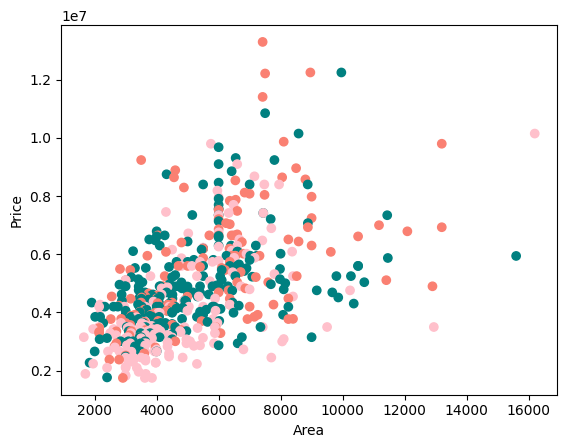

In [ ]:
# Put your answer here

colors = {'furnished': 'salmon',
          'semi-furnished': 'teal',
          'unfurnished': 'pink'
          }

plt.scatter(df['area'], df['price'], c=df['furnishingstatus'].map(colors))
plt.xlabel("Area")
plt.ylabel("Price")

plt.show()



#### 2. Apply the `get_dummies()` method to the categorical columns below.

- furnishingstatus
- mainroad
- guestroom
- basement
- hotwaterheating
- airconditioning
- prefarea

In [ ]:
# Put your answer here
columns = pd.get_dummies(data[['furnishingstatus','mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']], drop_first = True)
data = pd.concat([data, columns], axis = 1)

#### 3. Drop the categorical columns below.

- furnishingstatus
- mainroad
- guestroom
- basement
- hotwaterheating
- airconditioning
- prefarea

In [ ]:
# Put your answer here
data.drop(['furnishingstatus','mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea'], axis = 1, inplace = True)
data.head()

,price,area,bedrooms,bathrooms,stories,parking,furnishingstatus_semi-furnished,furnishingstatus_unfurnished,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes
0,13300000,7420,4,2,3,2,0,0,1,0,0,0,1,1
1,12250000,8960,4,4,4,3,0,0,1,0,0,0,1,0
2,12250000,9960,3,2,2,2,1,0,1,0,1,0,0,1
3,12215000,7500,4,2,2,3,0,0,1,0,1,0,1,1
4,11410000,7420,4,1,2,2,0,0,1,1,1,0,1,0


#### 4. Split the data set into a training and test set

In [ ]:
# Put your answer here
X = data.drop(['price'],axis=1)
y = data['price']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=15)

#### 4. Use the the `MinMaxScaler()` method to scale down the training and test set.

In [ ]:
# Put your answer here
scale = MinMaxScaler()
scale

MinMaxScaler()

In [ ]:
scale.fit(X_train)
X_train_scaled = scale.transform(X_train)
X_test_scaled = scale.transform(X_test)


#### 5. Create a new instance of a Linear Regression model  

In [ ]:
# Put your answer here
newModel = LinearRegression()

#### 6. Use the `fit()` method to train your model using the training set.

In [ ]:
# Put your answer here
newModel.fit(X_train_scaled,y_train)

LinearRegression()

#### 7. Use the `predict()` method using the test set

In [ ]:
 # Put your answer here
 y_pred = newModel.predict(X_test_scaled)
 y_pred


array([5493615.01251678, 2619006.55854896, 4573939.20014965,
       2535711.70737069, 5951030.37293526, 3327087.12304038,
       5056477.27506406, 3960744.45621834, 5728650.06758159,
       2630101.91190841, 3594384.96756867, 7473245.41624437,
       5542547.44785199, 4314437.21507889, 4907694.09711445,
       4274911.45425133, 5606677.49048796, 2543715.28506251,
       2831437.92892764, 6893088.65195062, 2862550.78618323,
       3524346.25657574, 6357733.52652578, 5504365.72426743,
       3464558.67983123, 5225961.83947291, 7087282.65779866,
       2799946.35155618, 4619147.32733347, 4066649.12494859,
       3023091.92715685, 4455420.99576692, 6818077.3856202 ,
       2720434.06279997, 4253931.67554456, 7870489.76205247,
       7524708.02321528, 7808117.68921552, 3201273.98482676,
       3134784.19456995, 5447281.46458446, 4247680.53786316,
       5461843.56168664, 4281123.26068538, 8004941.34292346,
       7930477.80249506, 6881488.52861056, 6115985.05083863,
       3349201.20299771,

#### 7. Get the R2 Score

In [ ]:
# Put your answer here
r2Score = r2_score(y_test, y_pred)
print ("R2 Score is ", r2Score)

R2 Score is  0.637046764291754


8. #### Use the normal equation to get the optimal slope and intercept

In [ ]:
def normalEquation(X, y):

    ones = np.ones((X.shape[0], 1))
    X = np.append(ones, X, axis=1)
    result = np.dot(np.linalg.pinv(np.dot(X.T, X)), np.dot(X.T, y))
    return result, result[0], result[1:]

In [ ]:
result, b, m = normalEquation(X,y)

print('Result is ', result)
print('Intercept is ', b)
print('Slope or Coefficients is ', m)

Result is  [ 4.27716938e+04  2.44139386e+02  1.14787560e+05  9.87668107e+05
  4.50848003e+05  2.77107101e+05 -4.63446200e+04 -4.11234386e+05
  4.21272589e+05  3.00525860e+05  3.50106904e+05  8.55447145e+05
  8.64958311e+05  6.51543800e+05]
Intercept is  42771.693818166386
Slope or Coefficients is  [ 2.44139386e+02  1.14787560e+05  9.87668107e+05  4.50848003e+05
  2.77107101e+05 -4.63446200e+04 -4.11234386e+05  4.21272589e+05
  3.00525860e+05  3.50106904e+05  8.55447145e+05  8.64958311e+05
  6.51543800e+05]
